In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np

In [2]:
env = gym.make('Acrobot-v1')

action_space = [0, 1, 2]

The state consists of the sin() and cos() of the two rotational joint
angles and the joint angular velocities :
[cos(theta1) sin(theta1) cos(theta2) sin(theta2) thetaDot1 thetaDot2].

In [3]:
theta_space = np.linspace(-1, 1, 10)
theta_dot_space = np.linspace(-10, 10, 10)

def get_state(observation):
    cos_theta1, sin_theta1, cos_theta2, sin_theta2, theta1_dot, theta2_dot = observation
    
    c_th1 = int(np.digitize(cos_theta1, theta_space))
    s_th1 = int(np.digitize(sin_theta1, theta_space))
    c_th2 = int(np.digitize(cos_theta2, theta_space))
    s_th2 = int(np.digitize(sin_theta2, theta_space))
    th1_dot = int(np.digitize(theta1_dot, theta_dot_space))
    th2_dot = int(np.digitize(theta2_dot, theta_dot_space))

    return (c_th1, s_th2, c_th2, s_th2, th1_dot, th2_dot)

In [4]:
def maxAction(Q, state, actions=[0, 1, 2]):
    values = np.array([Q[state,a] for a in actions])
    action = np.argmax(values)

    return action

In [5]:
n_games = 10000
alpha = 0.1
gamma = 0.99
eps = 0.9

states=[]
for c1 in range(11):
    for s1 in range(11):
        for c2 in range(11):
            for s2 in range(11):
                for dot1 in range(11):
                    for dot2 in range(11):
                        states.append((c1, s1, c2, s2, dot1, dot2))
                        
Q = {}
for state in states:
    for action in action_space:
        Q[state, action] = 0

episode  0 score  0 eps 0.9
episode  100 score  -456.0 eps 0.8600000000000044
episode  200 score  -230.0 eps 0.8200000000000088
episode  300 score  -356.0 eps 0.7800000000000132
episode  400 score  -184.0 eps 0.7400000000000176
episode  500 score  -203.0 eps 0.700000000000022
episode  600 score  -264.0 eps 0.6600000000000265
episode  700 score  -422.0 eps 0.6200000000000309
episode  800 score  -164.0 eps 0.5800000000000353
episode  900 score  -294.0 eps 0.5400000000000397
episode  1000 score  -312.0 eps 0.5000000000000441
episode  1100 score  -436.0 eps 0.46000000000004293
episode  1200 score  -340.0 eps 0.4200000000000418
episode  1300 score  -220.0 eps 0.38000000000004064
episode  1400 score  -307.0 eps 0.3400000000000395
episode  1500 score  -342.0 eps 0.30000000000003835
episode  1600 score  -203.0 eps 0.2600000000000372
episode  1700 score  -189.0 eps 0.22000000000003606
episode  1800 score  -186.0 eps 0.1800000000000349
episode  1900 score  -266.0 eps 0.14000000000003376
episode 

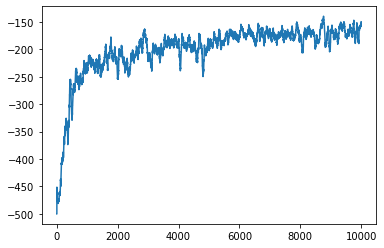

In [6]:
total_rewards = np.zeros(n_games)
eps_rewards = 0
for i in range(n_games):
    if i % 100 == 0:
        print('episode ', i, 'score ', eps_rewards, 'eps', eps)
    observation = env.reset()
    state = get_state(observation)
    done = False
    action = env.action_space.sample() if np.random.random() < eps else maxAction(Q, state)
    eps_rewards = 0
    while not done:
        observation_, reward, done, info = env.step(action)
        state_ = get_state(observation_)
        action_ = maxAction(Q, state_)
        eps_rewards += reward
        Q[state, action] = Q[state,action] + alpha*(reward + gamma*Q[state_,action_] - Q[state,action])
        state = state_
        action = action_
        
    total_rewards[i] = eps_rewards
    eps = eps - 4 / n_games if eps > 0.01 else 0.01
mean_rewards = np.zeros(n_games)
for t in range(n_games):
    mean_rewards[t] = np.mean(total_rewards[max(0, t-50):(t+1)])
plt.plot(mean_rewards)
plt.show()
